# 0.0 Import

In [14]:
from sklearn import datasets as dt
from matplotlib import pyplot as plt
from sklearn import model_selection as ms
from sklearn import linear_model as lm
from sklearn import metrics as mt
import numpy as np

# 1.0 Load datasets

In [2]:
X, y = dt.make_classification(n_samples=100,
                     n_features=2,
                     n_informative=1,
                     n_redundant=0,
                     n_clusters_per_class=1,
                     random_state=42
)

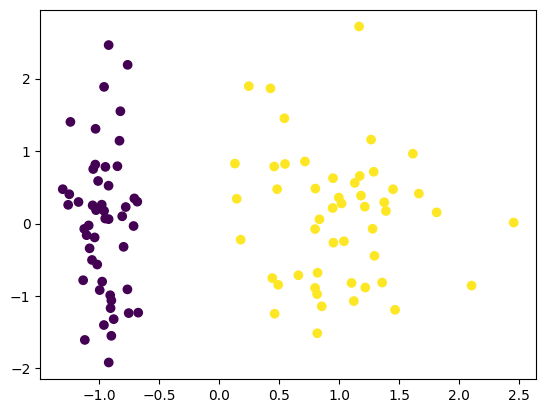

In [6]:
plt.scatter(X[:,0], X[:,1], c=y)

In [8]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# difine
model = lm.LogisticRegression()

# fit
model.fit(X_train, y_train)

# performance
yhat_test = model.predict(X_test)

f1 = mt.f1_score(y_test, yhat_test)
print(f"F1-score: {f1}")

F1-score: 1.0


# 2.0 Decision Boundary

In [ ]:
#yhat = theta_0 + theta_1*X1 + theta_2*x2

In [16]:
theta_0 = model.intercept_[0]
theta_1, theta_2 = model.coef_.T

In [17]:
c = -theta_0/theta_2
m = -theta_1/theta_2

In [20]:
xmin, xmax = -1.6, 2.7
ymin, ymax = -1.6, 3.0

xd = np.array([xmin, xmax])
yd = m*xd + c

(-1.6, 2.7)

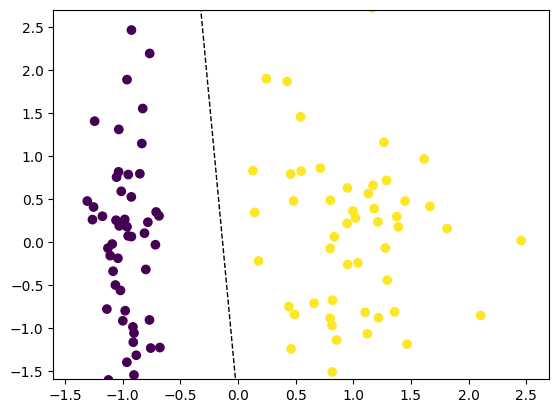

In [23]:
plt.plot(xd, yd, 'k', lw=1, ls='--');
#plt.fill_between(xd,yd,ymin, color='blue', alpha=0.2)
#plt.fill_between(xd,yd,ymax, color='orange', alpha=0.2)

plt.scatter(X[:,0], X[:,1], c=y)

plt.xlim(xmin, xmax)
plt.ylim(xmin, xmax)

# 3.0 Decision Boundary Probability

In [36]:
xx, yy = np.mgrid[-2:2.5:0.01, -2:3.0:0.01]
grid = np.c_[xx.ravel(), yy.ravel()]

In [37]:
probs = model.predict_proba(grid)[:,1].reshape(xx.shape)

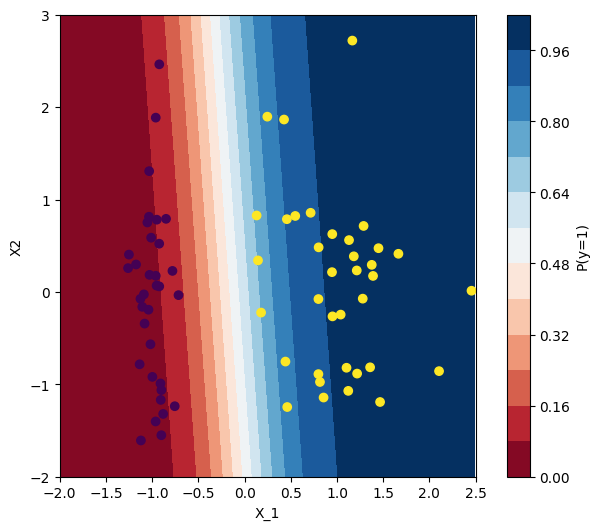

In [38]:
f, ax = plt.subplots(figsize=(8,6))
contour = ax.contourf(xx, yy, probs, 15, cmap='RdBu', vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("P(y=1)")

plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
ax.set(aspect='equal', 
       xlim=(-2, 2.5), ylim=(-2,3),
       xlabel='X_1', ylabel='X2');